In [ ]:
Q.1 Use Random Forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Random Forests\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

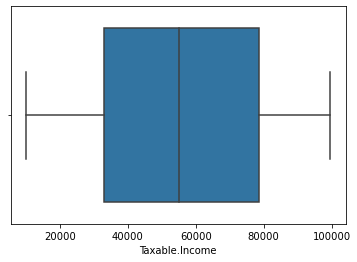

In [6]:
sns.boxplot(df['Taxable.Income'])

In [7]:
df=df.replace(('YES','NO'),(1,0))

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:,1] = labelencoder.fit_transform(df.iloc[:,1])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
data=df[['Taxable.Income','City.Population','Work.Experience','Undergrad','Marital.Status','Urban']]
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,68833,50047,10,0,2,1
1,33700,134075,18,1,0,1
2,36925,160205,30,0,1,1
3,50190,193264,15,1,2,1
4,81002,27533,28,0,1,0


In [10]:
#taxable income is <=30000 means Risky(0) otherwise Good(1)
data['Taxable.Income']=[0 if i<=30000 else 1 for i in data['Taxable.Income']]
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
595,1,39492,7,1,0,1
596,1,55369,2,1,0,1
597,1,154058,0,0,0,1
598,1,180083,17,1,1,0


In [ ]:
#Remove Outliers

In [11]:
from sklearn.ensemble import IsolationForest

In [12]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data)

IsolationForest(contamination=0.01, random_state=10)

In [13]:
pred_outliers=clf.predict(data)

In [14]:
pred_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [15]:
data['anomaly']=clf.predict(data)

In [16]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
0,1,50047,10,0,2,1,1
1,1,134075,18,1,0,1,1
2,1,160205,30,0,1,1,1
3,1,193264,15,1,2,1,1
4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,1,1
596,1,55369,2,1,0,1,1
597,1,154058,0,0,0,1,1
598,1,180083,17,1,1,0,1


In [17]:
data[data.anomaly ==-1]

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
16,0,34551,29,1,0,0,-1
34,0,183767,1,1,0,1,-1
126,0,195022,3,1,0,1,-1
168,0,167629,30,0,0,0,-1
280,0,33184,1,0,0,0,-1
541,0,191874,30,1,0,1,-1


In [18]:
data= data.drop(data.index[[16,34,126,168,280,541]],axis=0).reset_index()

In [19]:
data

,index,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban,anomaly
0,0,1,50047,10,0,2,1,1
1,1,1,134075,18,1,0,1,1
2,2,1,160205,30,0,1,1,1
3,3,1,193264,15,1,2,1,1
4,4,1,27533,28,0,1,0,1
...,...,...,...,...,...,...,...,...
589,595,1,39492,7,1,0,1,1
590,596,1,55369,2,1,0,1,1
591,597,1,154058,0,0,0,1,1
592,598,1,180083,17,1,1,0,1


In [20]:
data= data.drop(['index', 'anomaly'], axis=1)

In [21]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad,Marital.Status,Urban
0,1,50047,10,0,2,1
1,1,134075,18,1,0,1
2,1,160205,30,0,1,1
3,1,193264,15,1,2,1
4,1,27533,28,0,1,0
...,...,...,...,...,...,...
589,1,39492,7,1,0,1
590,1,55369,2,1,0,1
591,1,154058,0,0,0,1
592,1,180083,17,1,1,0


In [22]:
data['Taxable.Income'].value_counts()

1    476
0    118
Name: Taxable.Income, dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


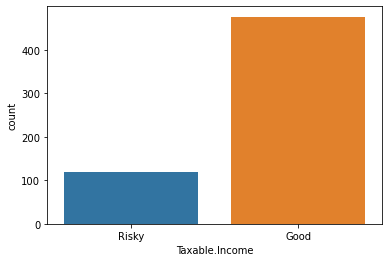

In [23]:
g = sns.countplot(data['Taxable.Income'])
g.set_xticklabels(["Risky","Good"])
plt.show()

In [24]:
x=data.iloc[:,1:]
y=data.iloc[:,0]

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=40)

In [31]:
Xtrain.shape, Xtest.shape,ytrain.shape,ytest.shape

((475, 5), (119, 5), (475,), (119,))

In [ ]:
#Using Entropy criteria for Random Forest classifier

In [34]:
model = RandomForestClassifier(n_estimators=200,max_depth=10,criterion='entropy')
model.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [35]:
pred=model.predict(Xtest)
pd.Series(pred).value_counts()

1    116
0      3
dtype: int64

In [36]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(ytest,pred)*100
print('Accuracy=',acc)
print(classification_report(ytest,pred))

Accuracy= 75.63025210084034
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      0.97      0.86        93

    accuracy                           0.76       119
   macro avg       0.39      0.48      0.43       119
weighted avg       0.61      0.76      0.67       119



In [ ]:
#Using Gini criteria for Random Forest classifier

In [37]:
model2 = RandomForestClassifier(n_estimators=200,criterion = 'gini',max_depth=10)
model2.fit(Xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=200)

In [39]:
pred1=model2.predict(Xtest)
pd.Series(pred1).value_counts()

1    115
0      4
dtype: int64

In [41]:
acc1 = accuracy_score(ytest, pred1) * 100
print("Accuracy =", acc1)
print(classification_report(ytest,pred1))

Accuracy = 76.47058823529412
              precision    recall  f1-score   support

           0       0.25      0.04      0.07        26
           1       0.78      0.97      0.87        93

    accuracy                           0.76       119
   macro avg       0.52      0.50      0.47       119
weighted avg       0.67      0.76      0.69       119



In [42]:
np.mean(pred1==ytest)

0.7647058823529411

In [ ]:
#Grid Search CV

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

model2 = RandomForestClassifier(random_state=1)
estimator = model2
n_estimators = {'n_estimators':[100, 300, 400, 700, 500, 800, 1200]}
criterion = {'criterion':['entropy','gini']}
max_depth = {'max_depth':[5, 8, 15, 25, 30]}

In [45]:
cl = GridSearchCV(estimator, n_estimators, cv = 8, verbose = 1,n_jobs = -1)
cl.fit(x,y)
print(cl.best_score_)
print(cl.best_params_)

Fitting 8 folds for each of 7 candidates, totalling 56 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:   20.8s finished


0.7574774774774775
{'n_estimators': 800}


In [46]:
cl1=GridSearchCV(estimator, criterion, cv = 8, verbose = 1,n_jobs = -1)
cl1.fit(x,y)
print(cl1.best_score_)
print(cl1.best_params_)

Fitting 8 folds for each of 2 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.0s finished


0.7423198198198198
{'criterion': 'entropy'}


In [47]:
cl2=GridSearchCV(estimator, max_depth, cv = 8, verbose = 1,n_jobs = -1)
cl2.fit(x,y)
print(cl2.best_score_)
print(cl2.best_params_)

Fitting 8 folds for each of 5 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.7996621621621622
{'max_depth': 5}


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.6s finished


In [48]:
cl.best_params_,cl1.best_params_,cl2.best_params_

({'n_estimators': 800}, {'criterion': 'entropy'}, {'max_depth': 5})

In [ ]:
#Using this parameters 

In [49]:
classifier= RandomForestClassifier(n_estimators=800,max_depth=5,criterion='entropy',random_state=1)
classifier.fit(Xtrain, ytrain)
pred2 = classifier.predict(Xtest)     
acc2 = accuracy_score(ytest, pred2) * 100
print("Accuracy =", acc2)
print(classification_report(ytest, pred2))

Accuracy = 78.15126050420169
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        93

    accuracy                           0.78       119
   macro avg       0.39      0.50      0.44       119
weighted avg       0.61      0.78      0.69       119



C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model Validatiion

In [ ]:
#Using train test split

In [50]:
m1 =RandomForestClassifier(n_estimators=800,max_depth=5,criterion='entropy')
m1.fit(Xtrain,ytrain)
result = m1.score(Xtest,ytest)
result*100

78.15126050420169

In [ ]:
#Using cross validation

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds =10
seed = 200

kfold = KFold(n_splits=num_folds, random_state=None)
m2 = RandomForestClassifier(n_estimators=800,max_depth=5,criterion='entropy',random_state =1)
results = cross_val_score(m2,x,y,cv=kfold)

print(results.mean()*100.0)
print(results.std()*100)

80.15819209039549
6.594060239204076


In [ ]:
#Using Leave One Out Cross Validation